# Calcular factor de compresibilidad usando ecuaciones de estado

## Problema

Determine las raíces del factor de compresibilidad empleando la ecuación generalizada de Peng-Robinson para una sustancia que se encuentra a una temperatura reducida $T_r = 0.7$, $P_r = 0.1$ y un factor acéntrico $\omega = 0.090$

## Solucion

Se debe resolver la siguiente ecuacion

\begin{align*}
&\alpha = \left[1 + \left(0.37464 + 1.5422* \omega - 0.26992*\omega^2\right) * \left(1 - \sqrt(Tr)\right)\right]^2 \\
&A = 0.45724\left(\frac{P_{r}}{T_{r}^{2}}\right)\:\alpha \\
&B = 0.07780\left(\frac{P_{r}}{T_{r}}\right) \\
&Z^3 + (-1+B)\:Z^2 + (A-2B-3B^2)\:Z + (-AB + B^2+B^3)
\end{align*}

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

plt.style.use('fivethirtyeight')

In [23]:
def eos(z, tr, pr, omega):
    '''
    Calculo de las raices de la ecuaion cubica de Peng Robinson
    input: Tr - Temperatura reducida
           Pr: Presion reducida
           omega: factor acentrico de sustancia
    output:
           zsol: objeto polinomico de numpy
           zeval: valores de funcion para grafico
    '''
    alpha = (1 + (0.37464 + 1.5422*omega - 0.26992*omega**2) * 
             (1 - np.sqrt(tr)))**2
    A = 0.45724 * (pr/tr**2) * alpha
    B = 0.07780 * (pr/tr)
    p = -1 + B
    q = A - 2*B - 3*B**2
    r = -A*B + B**2 + B**3
    
    zsol = np.polynomial.Polynomial((r, q, p, 1))
    zeval = z**3 + p * z**2 + q * z + r
    return [zeval, zsol]


Antes de estimar los valores de las raices, se construye un grafico para observar el compportamiento.

In [24]:
z = np.linspace(0, 1, 100)
tr = 0.7
pr = 0.1
omega = 0.090

funcionZ = eos(z, tr, pr, omega)

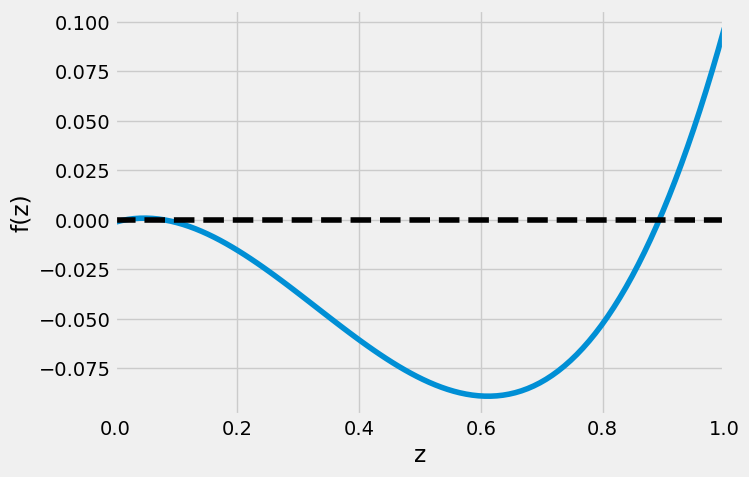

In [27]:
ceros = np.zeros_like(z)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z, funcionZ[0])
ax.plot(z, ceros, 'k--')
plt.xlim([0,1])
ax.set_xlabel('z')
ax.set_ylabel('f(z)')

plt.show()

In [26]:
solucion_polinomio = funcionZ[1].roots()
Zvalues = solucion_polinomio[~np.iscomplex(solucion_polinomio)].real
print("Los valores de Z son para líquido: {:.3f} y vapor {:.3f}". format(Zvalues[2], Zvalues[0]))

Los valores de Z son para líquido: 0.893 y vapor 0.015
